# Филтирање на слика во фреквенциски домен
## Bandpass Gaussian filter

За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.

$$I_{f,filt}=HI_f$$

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката: 

$$H(i,j)=e^{-\frac{d(i,j)^2}{f_{h}^{2}}}(1-e^{-\frac{d(i,j)^2}{f_{l}^{2}}})$$

Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓 𝑙 се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме. 
 
Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

$$F(u,v)=\int{\int_{-\infty}^{\infty}} f(x,y) e^{-i2\pi(ux+vy)} dxdy$$

А во дискретниот домен горната равенка може да биде преведена како 

$$F(u,v)=\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty} f[m,n]\cdot e^{-i2\pi(umx_0+vny_0)}$$

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева трансформација е дефинирана како:

$$f(x,y)=\int{\int_{-\infty}^{\infty}} F(u,v) e^{i2\pi(ux+vy)} dxdy$$

А во дискретниот домен горната равенка може да биде преведена како

$$f(x,y)=\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty} F(m,n)\cdot e^{i2\pi(xmu_0+ynv_0)}$$

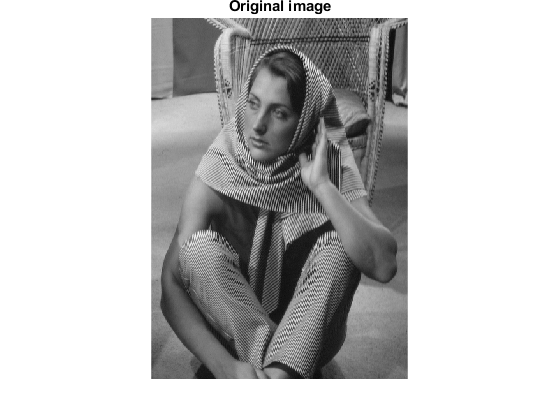

In [55]:
original_image=imread('Barbara.tif');
imshow(original_image);title("Original image");

In [56]:
fft_image = fftshift(fft2(original_image));

In [57]:
%%file create_filter.m

function filter = create_filter(nx,ny,d0,d1)
filter = ones(nx,ny);
for i = 0:nx-1
        for j = 0:ny-1
            dist= sqrt((i-nx/2)^2 + (j-ny/2)^2);
            filter(i+1,j+1) = exp(-(dist^2)/(d1^2)).*(1.0-exp(-(dist^2)/(d0^2)));
        end
end
filter(nx/2+1,ny/2+1)=1;
end

Created file 'C:\Users\Ana Marija\Desktop\faks\mnivi\Domasna\Domasna-zadaca-MNIVI\create_filter.m'.


In [58]:
transformed_image = abs(ifft2(ifftshift(create_filter(566,402,1,61).*fft_image)));


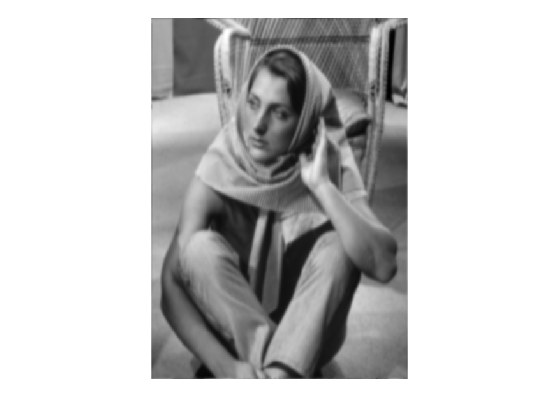

In [59]:
figure, imshow(transformed_image,[])